In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import os
import cv2
from PIL import Image
from patchify import patchify
import splitfolders

In [2]:
patch_size = 256

In [3]:
root_directory = 'dataset/'

In [4]:
img_dir = root_directory + "original/image/"
for path, subdirs, files in os.walk(img_dir):
    dirname = path.split(os.path.sep)[-1]
    images = os.listdir(path)
    for i, image_name in enumerate(images):
        if image_name.endswith(".jpg"):
            image = cv2.imread(path + "/" + image_name, 1)
            SIZE_X = (image.shape[1] // patch_size) * patch_size
            SIZE_Y = (image.shape[0] // patch_size) * patch_size
            image = Image.fromarray(image)
            image = image.crop((0, 0, SIZE_X, SIZE_Y))
            image = np.array(image)          
   
            print("Patchifying Image :", path + image_name)
            patches_img = patchify(image, (patch_size, patch_size, 3), step=256)
    
            for i in range(patches_img.shape[0]):
                for j in range(patches_img.shape[1]):
                    single_patch_img = patches_img[i, j, :, :]
                    single_patch_img = single_patch_img[0]                          
                    cv2.imwrite(root_directory+ "256_patches/image/" + image_name[:-4] + "_patch_" + str(i) + str(j) + ".jpg", single_patch_img)

Patchifying Image : dataset/original/image/156951_sat.jpg
Patchifying Image : dataset/original/image/157839_sat.jpg
Patchifying Image : dataset/original/image/158163_sat.jpg
Patchifying Image : dataset/original/image/159177_sat.jpg
Patchifying Image : dataset/original/image/159280_sat.jpg
Patchifying Image : dataset/original/image/159322_sat.jpg
Patchifying Image : dataset/original/image/160037_sat.jpg
Patchifying Image : dataset/original/image/161109_sat.jpg
Patchifying Image : dataset/original/image/161838_sat.jpg
Patchifying Image : dataset/original/image/162310_sat.jpg
Patchifying Image : dataset/original/image/164029_sat.jpg
Patchifying Image : dataset/original/image/16453_sat.jpg
Patchifying Image : dataset/original/image/166293_sat.jpg
Patchifying Image : dataset/original/image/166805_sat.jpg
Patchifying Image : dataset/original/image/168514_sat.jpg
Patchifying Image : dataset/original/image/170535_sat.jpg
Patchifying Image : dataset/original/image/172307_sat.jpg
Patchifying Ima

In [10]:
mask_dir = root_directory + "original/mask/"
for path, subdirs, files in os.walk(mask_dir):
    dirname = path.split(os.path.sep)[-1]
    masks = os.listdir(path)
    for i, mask_name in enumerate(masks):
        if mask_name.endswith(".png"):
            mask = cv2.imread(path + "/" + mask_name, 1)
            SIZE_X = (mask.shape[1] // patch_size) * patch_size
            SIZE_Y = (mask.shape[0] // patch_size) * patch_size
            mask = Image.fromarray(mask)
            mask = mask.crop((0, 0, SIZE_X, SIZE_Y))
            mask = np.array(mask)
   
            print("Patchifying mask :", path + mask_name)
            patches_mask = patchify(mask, (patch_size, patch_size, 3), step=256)
    
            for i in range(patches_mask.shape[0]):
                for j in range(patches_mask.shape[1]):
                    single_patch_mask = patches_mask[i,j,:,:]   
                    single_patch_mask = single_patch_mask[0]                       
                    cv2.imwrite(root_directory + "256_patches/mask/" + mask_name[:-4] + "_patch_" + str(i) + str(j) + ".png", single_patch_mask)

Patchifying mask : dataset/original/mask/156951_mask.png
Patchifying mask : dataset/original/mask/157839_mask.png
Patchifying mask : dataset/original/mask/158163_mask.png
Patchifying mask : dataset/original/mask/159177_mask.png
Patchifying mask : dataset/original/mask/159280_mask.png
Patchifying mask : dataset/original/mask/159322_mask.png
Patchifying mask : dataset/original/mask/160037_mask.png
Patchifying mask : dataset/original/mask/161109_mask.png
Patchifying mask : dataset/original/mask/161838_mask.png
Patchifying mask : dataset/original/mask/162310_mask.png
Patchifying mask : dataset/original/mask/164029_mask.png
Patchifying mask : dataset/original/mask/16453_mask.png
Patchifying mask : dataset/original/mask/166293_mask.png
Patchifying mask : dataset/original/mask/166805_mask.png
Patchifying mask : dataset/original/mask/168514_mask.png
Patchifying mask : dataset/original/mask/170535_mask.png
Patchifying mask : dataset/original/mask/172307_mask.png
Patchifying mask : dataset/origi

In [11]:
train_img_dir = "dataset/256_patches/image/"
train_mask_dir = "dataset/256_patches/mask/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

In [12]:
num_images = len(os.listdir(train_img_dir))
num_images

10368

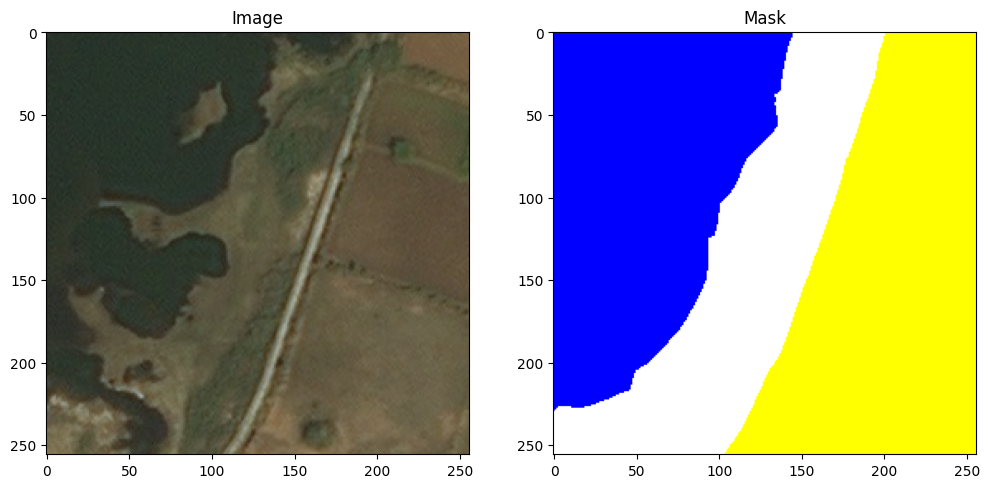

In [22]:
img_num = random.randint(0, num_images - 1)

img_for_plot = cv2.imread(train_img_dir + img_list[img_num], 1)
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot = cv2.imread(train_mask_dir + msk_list[img_num], 1)
mask_for_plot = cv2.cvtColor(mask_for_plot, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot)
plt.title('Mask')
plt.show()

In [15]:
input_folder = 'dataset/256_patches/'
output_folder = 'dataset/data_for_training_and_testing/'
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2), group_prefix=None)

Copying files: 41472 files [00:56, 738.94 files/s] 
